# Multiple Linear Regression
## Bike Sharing Demand

#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues. They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Step 1: Reading and Understanding the Data

In [60]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [61]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split

In [62]:
## reading data
bike_data = pd.read_csv('day.csv')

In [63]:
# Check the head of the dataset
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the bike dataframe

In [64]:
bike_data.shape

(730, 16)

In [65]:
## dropping casual and registered columns
bike_data.drop(['casual', 'registered'], inplace=True, axis = 1)
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [66]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(9), object(1)
memory usage: 79.9+ KB


In [67]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


## Step 2: Visualising the Data

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

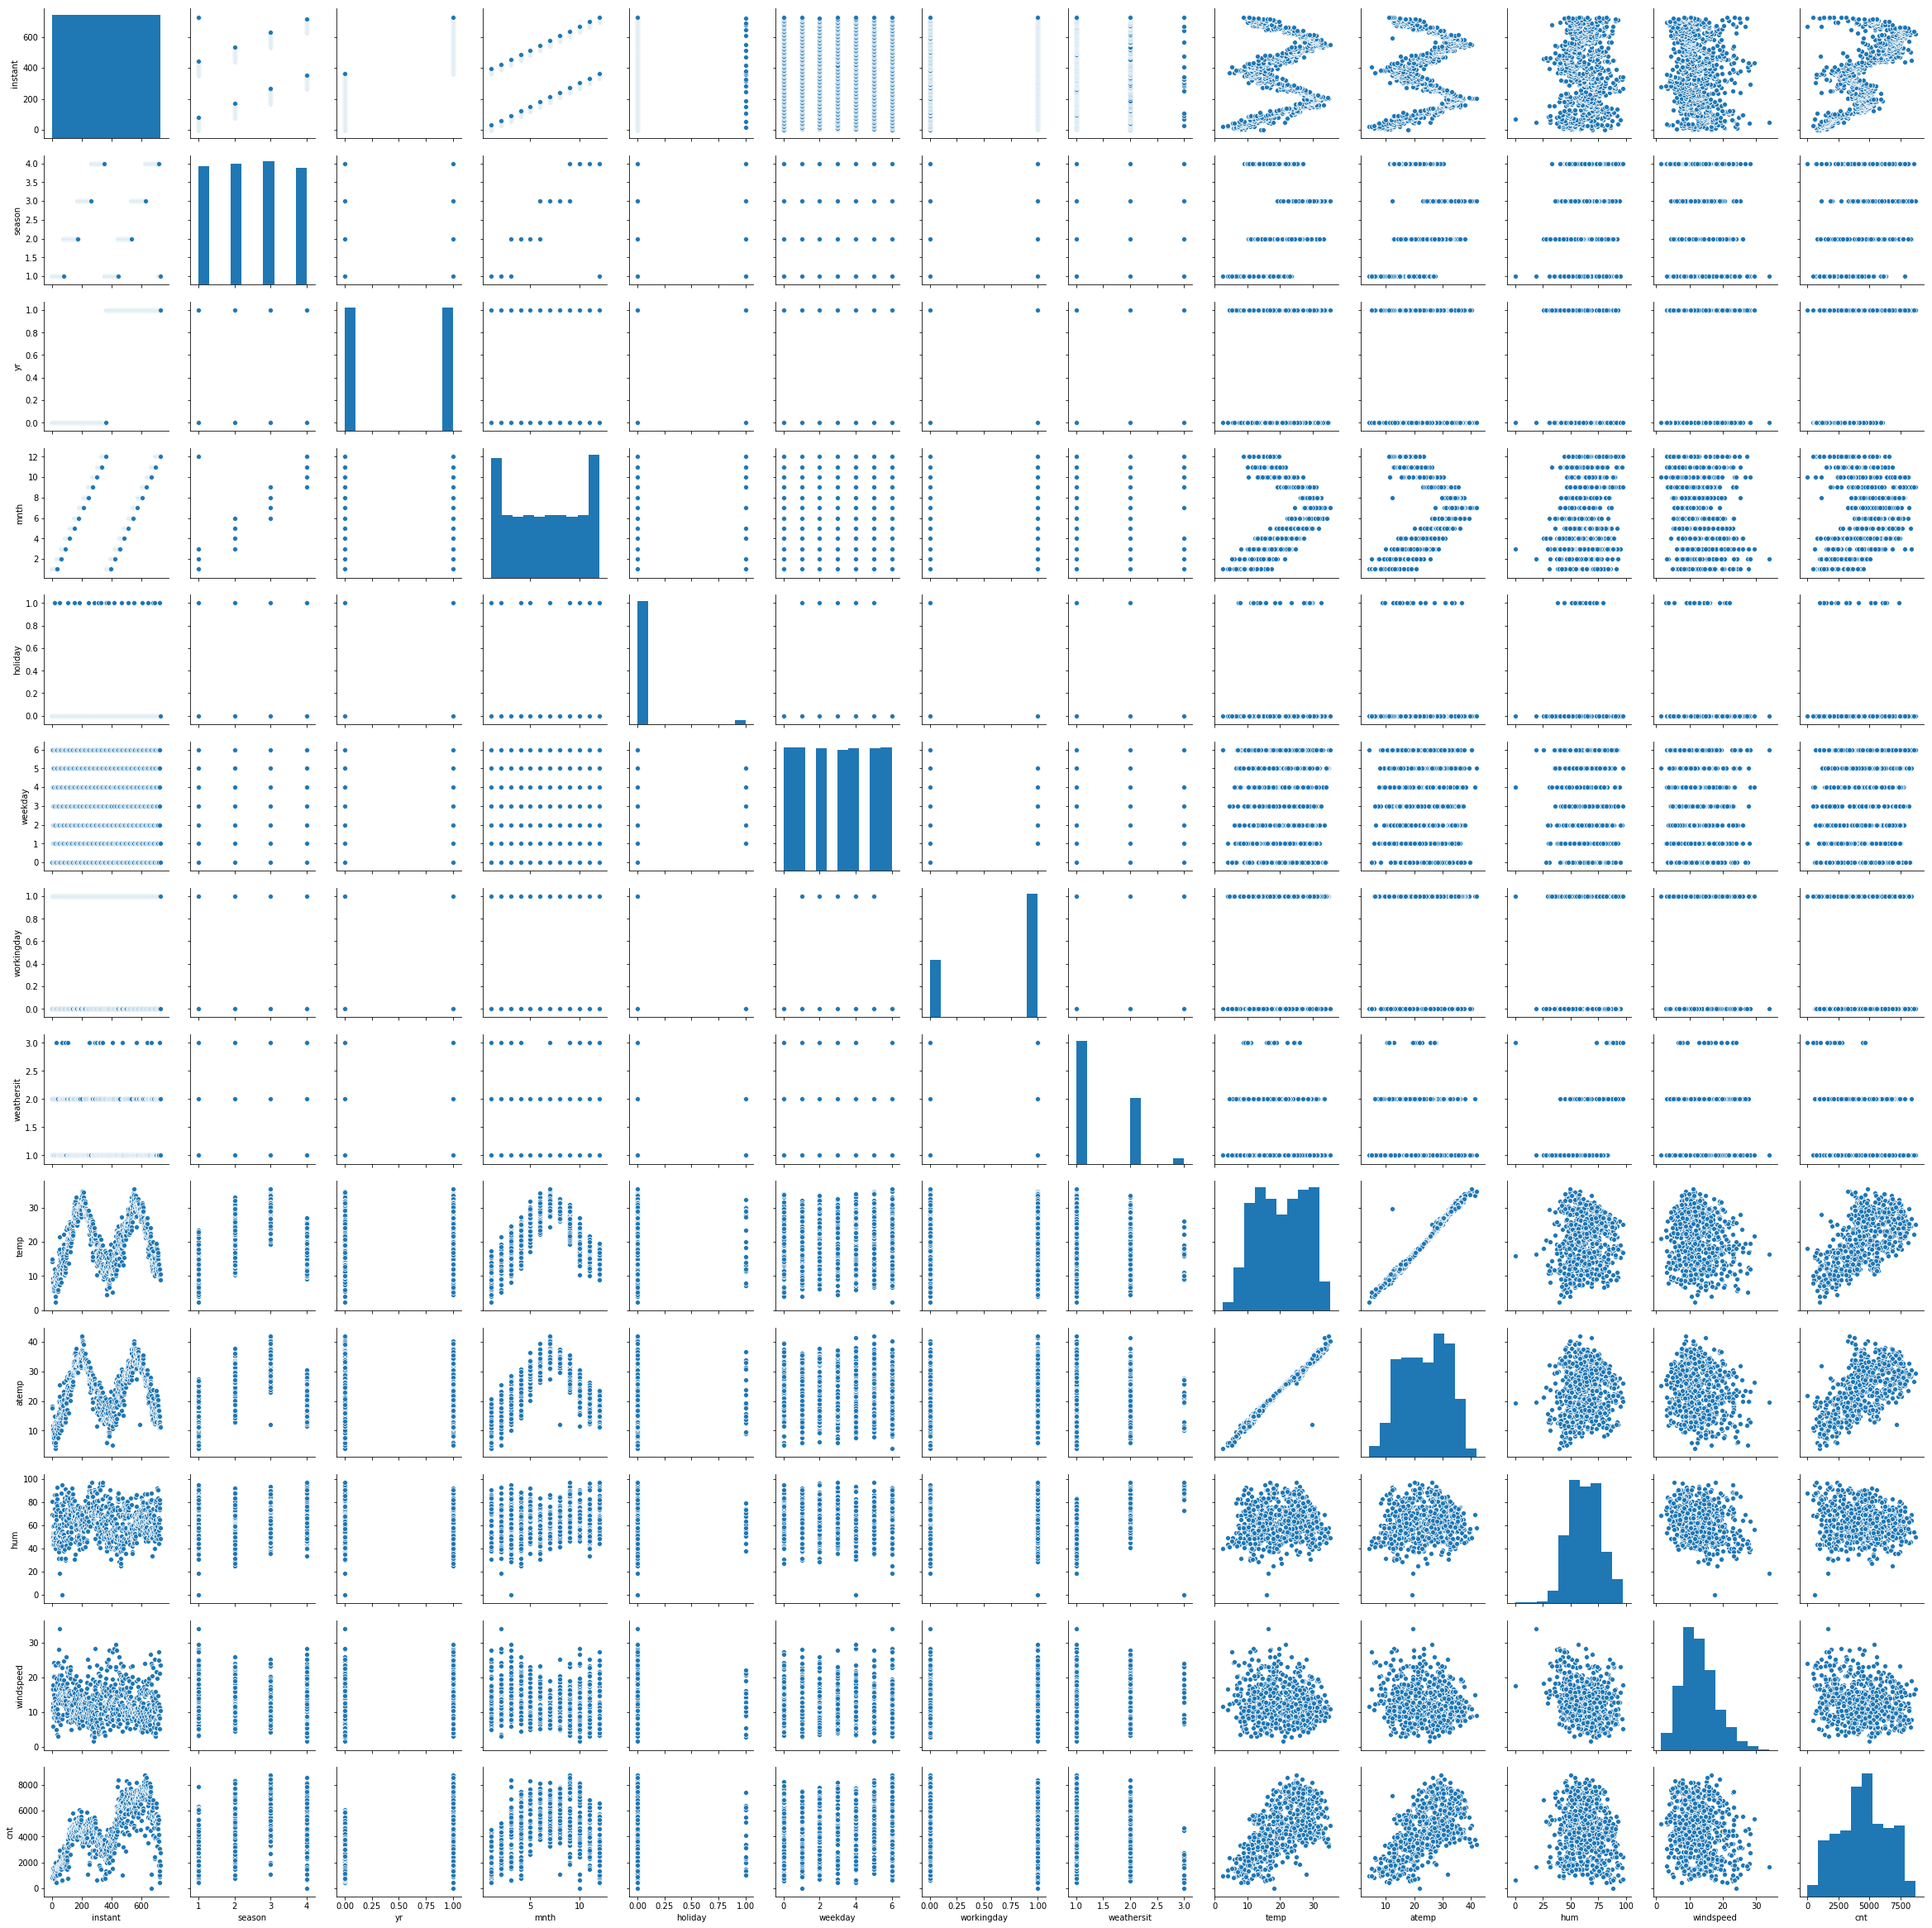

In [69]:
sns.pairplot(bike_data)
plt.show()

#### Visualising Categorical Variables

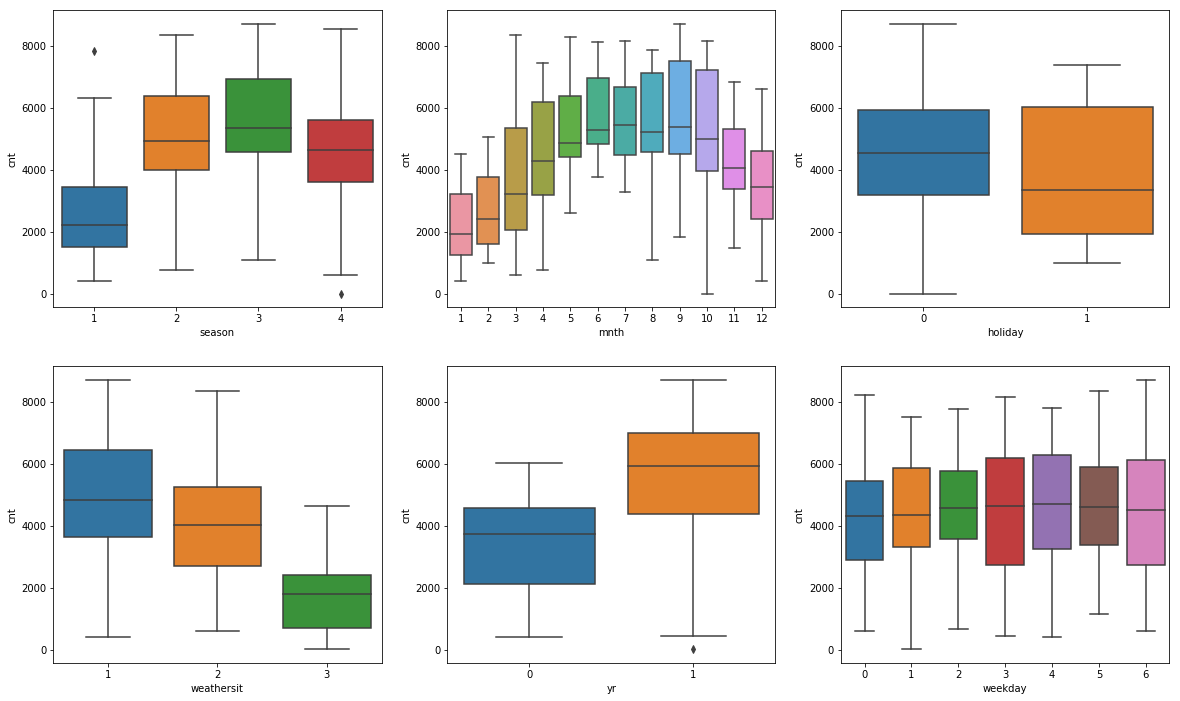

In [70]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_data)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.subplot(2,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.show()

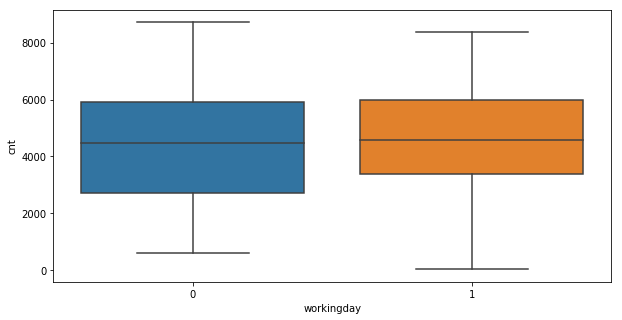

In [71]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data)
plt.show()

## Step 3: Data Preparation

In [72]:
### Converting some numeric values to categorical data
import calendar
bike_data['mnth'] = bike_data['mnth'].apply(lambda x: calendar.month_abbr[x])

In [73]:
## maping seasons
bike_data.season = bike_data.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [74]:
## mapping weathersit
bike_data.weathersit = bike_data.weathersit.map({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

In [75]:
# Check the dataframe now

bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,Spring,0,Jan,0,6,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,Spring,0,Jan,0,0,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,Spring,0,Jan,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,Spring,0,Jan,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,Spring,0,Jan,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Dummy Variables

In [76]:
### creating dummy variables for season , mnth ,weathersit ,weekday
dummy = bike_data[['season','mnth','weekday','weathersit']]

In [77]:
dummy = pd.get_dummies(dummy,drop_first=True )

In [78]:
## adding dummy variables to original dataset
bike_data = pd.concat([dummy,bike_data],axis = 1)

In [79]:
# Now let's see the head of our dataframe.

bike_data.head()

,weekday,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,6,1,0,0,0,0,0,1,0,0,...,Jan,0,6,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,0,1,0,0,0,0,0,1,0,0,...,Jan,0,0,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,1,0,0,0,0,0,1,0,0,...,Jan,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,2,1,0,0,0,0,0,1,0,0,...,Jan,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,3,1,0,0,0,0,0,1,0,0,...,Jan,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [80]:
## dropping columns for which dummy variables were created
bike_data.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)

In [81]:
bike_data.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,1,01-01-2018,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,2,02-01-2018,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,3,03-01-2018,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,4,04-01-2018,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,5,05-01-2018,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [51]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(bike_data, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

In [52]:
from sklearn.preprocessing import MinMaxScaler

In [53]:
scaler = MinMaxScaler()

In [54]:
# AApply scaler() to all the columns except the 'dummy' variables.
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

train[num_vars] = scaler.fit_transform(train[num_vars])

In [55]:
train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
653,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0.509887,0.501133,0.575354,0.300794,922,6612,0.864243
576,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0.815169,0.766351,0.725633,0.264686,968,6248,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0.442393,0.438975,0.640189,0.255342,956,3110,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0.245101,0.200348,0.498067,0.663106,364,1432,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0.395666,0.391735,0.504508,0.188475,1120,3100,0.482973


In [56]:
train.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,...,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,837.543137,3648.839216,0.513620
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,...,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,675.921998,1580.336986,0.224593
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,20.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,311.000000,2468.250000,0.356420
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,700.000000,3657.000000,0.518638
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,1076.250000,4841.000000,0.684710
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3283.000000,6946.000000,1.000000


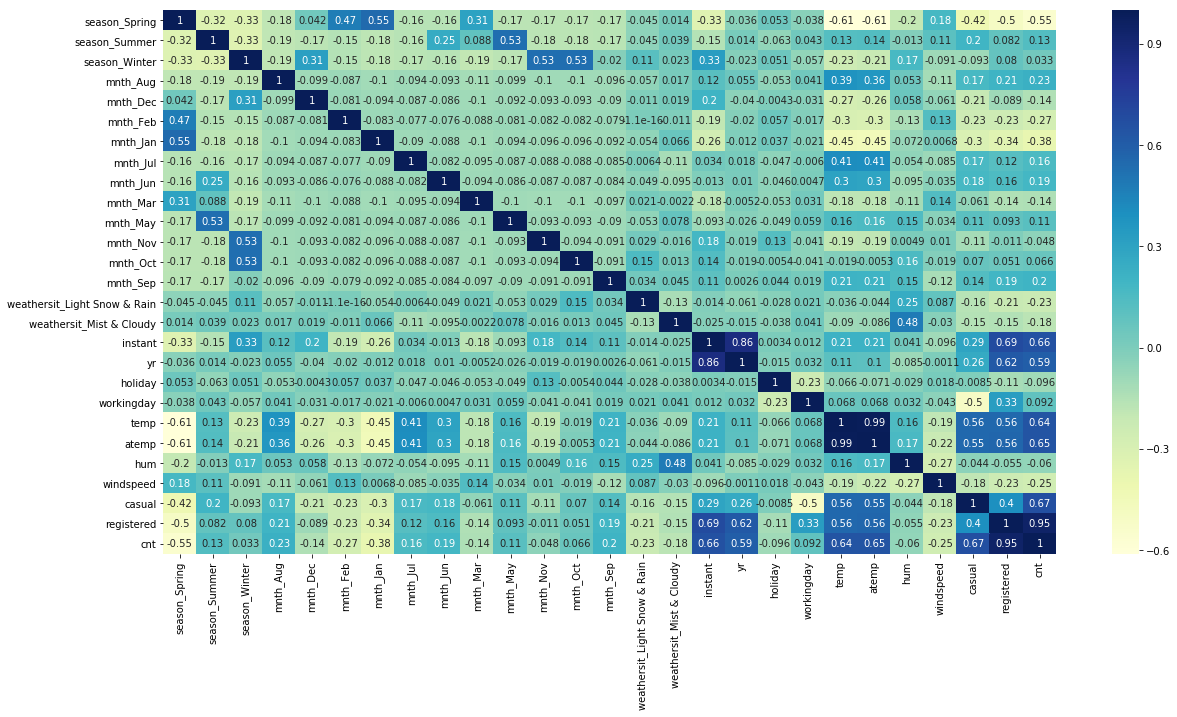

In [58]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 10))
sns.heatmap(train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, `area` seems to the correlated to `price` the most. Let's see a pairplot for `area` vs `price`.

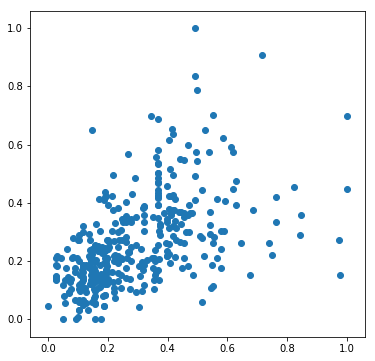

In [28]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.area, df_train.price)
plt.show()

So, we pick `area` as the first variable and we'll try to fit a regression line to that.

### Dividing into X and Y sets for the model building

In [29]:
y_train = df_train.pop('price')
X_train = df_train

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [30]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['area']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [31]:
# Check the parameters obtained

lr.params

const    0.126894
area     0.462192
dtype: float64

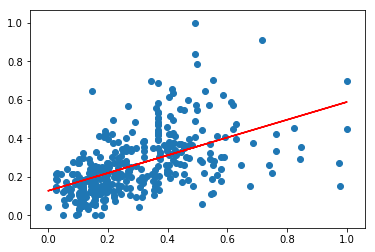

In [32]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.127 + 0.462*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [33]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Tue, 09 Oct 2018   Prob (F-statistic):           3.15e-29
Time:                        13:02:46   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.0

### Adding another variable

The R-squared value obtained is `0.283`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. `bathrooms`.

In [34]:
# Assign all the feature variables to X
X_train_lm = X_train[['area', 'bathrooms']]

In [35]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const        0.104589
area         0.398396
bathrooms    0.298374
dtype: float64

In [36]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Tue, 09 Oct 2018   Prob (F-statistic):           2.51e-54
Time:                        13:02:47   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.0

We have clearly improved the model as the value of adjusted R-squared as its value has gone up to `0.477` from `0.281`.
Let's go ahead and add another variable, `bedrooms`.

In [37]:
# Assign all the feature variables to X
X_train_lm = X_train[['area', 'bathrooms','bedrooms']]

In [38]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const        0.041352
area         0.392211
bathrooms    0.259978
bedrooms     0.181863
dtype: float64

In [39]:
# Print the summary of the model

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     128.2
Date:                Tue, 09 Oct 2018   Prob (F-statistic):           3.12e-57
Time:                        13:02:47   Log-Likelihood:                 297.76
No. Observations:                 381   AIC:                            -587.5
Df Residuals:                     377   BIC:                            -571.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.018      2.292      0.0

We have improved the adjusted R-squared again. Now let's go ahead and add all the feature variables.

### Adding all the variables to the model

In [40]:
# Check all the columns of the dataframe

housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [41]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const              0.020033
area               0.234664
bedrooms           0.046735
bathrooms          0.190823
stories            0.108516
mainroad           0.050441
guestroom          0.030428
basement           0.021595
hotwaterheating    0.084863
airconditioning    0.066881
parking            0.060735
prefarea           0.059428
semi-furnished     0.000921
unfurnished       -0.031006
dtype: float64

In [42]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Tue, 09 Oct 2018   Prob (F-statistic):           8.83e-83
Time:                        13:02:47   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021     

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [43]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,bedrooms,7.33
4,mainroad,6.02
0,area,4.67
3,stories,2.70
11,semi-furnished,2.19
9,parking,2.12
6,basement,2.02
12,unfurnished,1.82
8,airconditioning,1.77
2,bathrooms,1.67


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `semi-furnished` as it has a very high p-value of `0.938`. Let's go ahead and drop this variables

In [45]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('semi-furnished', 1,)

In [46]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [47]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Tue, 09 Oct 2018   Prob (F-statistic):           1.07e-83
Time:                        13:02:48   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019     

In [48]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,bedrooms,6.59
4,mainroad,5.68
0,area,4.67
3,stories,2.69
9,parking,2.12
6,basement,2.01
8,airconditioning,1.77
2,bathrooms,1.67
10,prefarea,1.51
5,guestroom,1.47


### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `bedroom` has a significantly high VIF (`6.6`) and a high p-value (`0.206`) as well. Hence, this variable isn't of much use and should be dropped.

In [49]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('bedrooms', 1)

In [50]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [51]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Tue, 09 Oct 2018   Prob (F-statistic):           2.73e-84
Time:                        13:02:48   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015     

In [52]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,mainroad,4.79
0,area,4.55
2,stories,2.23
8,parking,2.10
5,basement,1.87
7,airconditioning,1.76
1,bathrooms,1.61
9,prefarea,1.50
4,guestroom,1.46
10,unfurnished,1.33


### Dropping the variable and updating the model

As you might have noticed, dropping `semi-furnised` decreased the VIF of `mainroad` as well such that it is now under 5. But from the summary, we can still see some of them have a high p-value. `basement` for instance, has a p-value of 0.03. We should drop this variable as well.

In [53]:
X = X.drop('basement', 1)

In [54]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [55]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     77.18
Date:                Tue, 09 Oct 2018   Prob (F-statistic):           3.13e-84
Time:                        13:02:49   Log-Likelihood:                 378.51
No. Observations:                 381   AIC:                            -735.0
Df Residuals:                     370   BIC:                            -691.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0428      0.014     

In [56]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,mainroad,4.55
0,area,4.54
2,stories,2.12
7,parking,2.10
6,airconditioning,1.75
1,bathrooms,1.58
8,prefarea,1.47
9,unfurnished,1.33
4,guestroom,1.30
5,hotwaterheating,1.12


Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [57]:
y_train_price = lr_4.predict(X_train_lm)

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Errors')

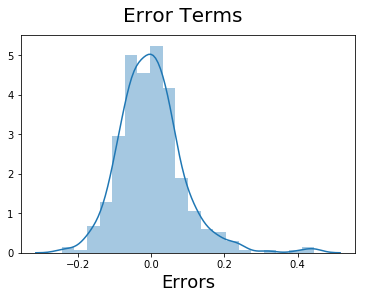

In [58]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [59]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [60]:
df_test.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.263176,0.298548,0.408537,0.158537,0.268293,0.865854,0.195122,0.347561,0.030488,0.353659,0.205285,0.237805,0.420732,0.329268
std,0.172077,0.211922,0.147537,0.281081,0.276007,0.341853,0.397508,0.477654,0.172452,0.479569,0.289322,0.427043,0.495189,0.471387
min,0.006061,-0.016367,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142424,0.148011,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.226061,0.259724,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.346970,0.397439,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,0.909091,1.263992,0.800000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [61]:
y_test = df_test.pop('price')
X_test = df_test

In [62]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [63]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4.drop(["bedrooms", "semi-furnished", "basement"], axis = 1)

In [64]:
# Making predictions using the fourth model

y_pred_m4 = lr_4.predict(X_test_m4)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0,0.5,'y_pred')

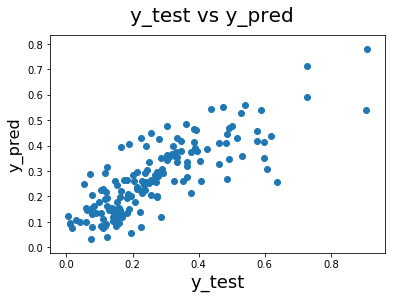

In [65]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      


We can see that the equation of our best fitted line is:

$ price = 0.236  \times  area + 0.202  \times  bathrooms + 0.11 \times stories + 0.05 \times mainroad + 0.04 \times guestroom + 0.0876 \times hotwaterheating + 0.0682 \times airconditioning + 0.0629 \times parking + 0.0637 \times prefarea - 0.0337 \times unfurnished $


Overall we have a decent model, but we also acknowledge that we could do better. 

We have a couple of options:
1. Add new features (bathrooms/bedrooms, area/stories, etc.)
2. Build a non-linear model